In [1]:
import numpy as np
import pandas as pd

In [2]:
airData_sn = pd.read_csv('AirQualityUCI.csv', sep=';')

In [3]:
airData_sn.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
#Replacing , with . in the dataframe
airData_sn = airData_sn.replace(',', '.', regex=True)

In [5]:
airData_sn = airData_sn.iloc[:,:-2]

In [6]:
airData_sn.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
airData_sn.shape

(9471, 15)

In [8]:
airData_sn.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [9]:
#dropping the null rows
airData_sn = airData_sn.dropna()

In [10]:
airData_sn.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [11]:
airData_sn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [12]:
#converting the remaining object columns to numeric for further analysis
airData_sn_obj = ["CO(GT)","C6H6(GT)","T","RH","AH"]
for col in airData_sn_obj:
  airData_sn[col] = pd.to_numeric(airData_sn[col], errors='coerce')

print(airData_sn.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


In [13]:
airData_sn.replace(-200.0,np.nan,inplace=True)

In [14]:
airData_sn.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [15]:
airData_sn.mean()

<ipython-input-15-b9d0e5816455>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  airData_sn.mean()


CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

In [16]:
#filling up the remaining missing values by calculating mean
airData_sn = airData_sn.fillna(airData_sn.mean())

<ipython-input-16-6d2abff2beb6>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  airData_sn = airData_sn.fillna(airData_sn.mean())


In [17]:
airData_sn.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

<ipython-input-18-381f6d35400c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = airData_sn.corr()


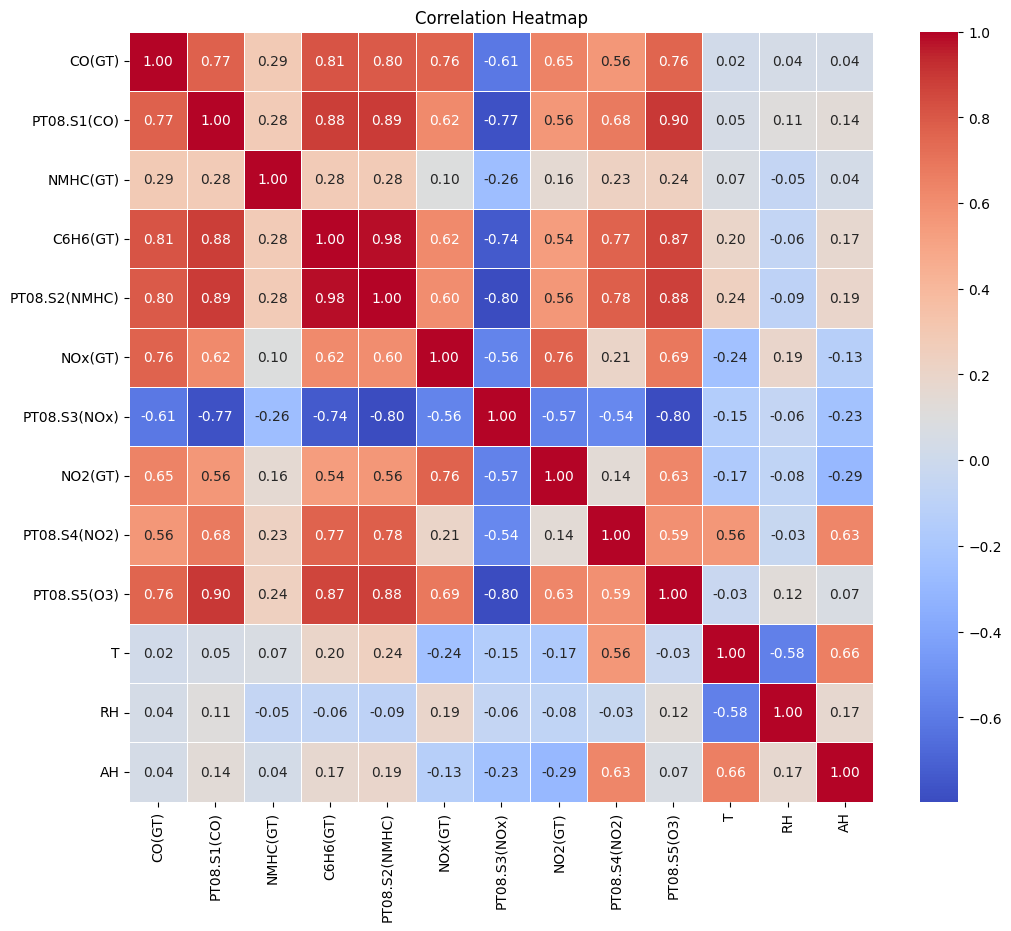

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = airData_sn.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
df = pd.DataFrame()

In [20]:
df['DateTime'] = pd.to_datetime(airData_sn['Date'] + ' ' +airData_sn['Time'], format='%d/%m/%Y %H.%M.%S')


In [21]:
df['CO(GT)'] = airData_sn['CO(GT)']
df.head()

,DateTime,CO(GT)
0,2004-03-10 18:00:00,2.6
1,2004-03-10 19:00:00,2.0
2,2004-03-10 20:00:00,2.2
3,2004-03-10 21:00:00,2.2
4,2004-03-10 22:00:00,1.6


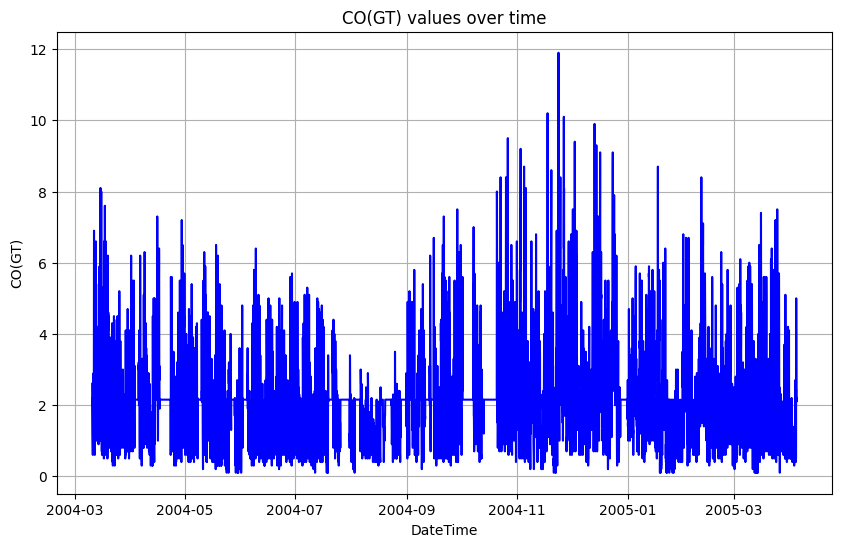

In [22]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
plt.figure(figsize=(10, 6))
plt.plot(df['DateTime'], df['CO(GT)'], linestyle='-', color='b')
plt.title('CO(GT) values over time')
plt.xlabel('DateTime')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()


In [23]:
df.shape

(9357, 2)

In [24]:
df.columns.tolist()

['DateTime', 'CO(GT)']

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

df.set_index('DateTime', inplace=True)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

sequence_length = 3
X, y = [], []
for i in range(len(df_scaled) - sequence_length):
    X.append(df_scaled[i:i + sequence_length])
    y.append(df_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

In [26]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [27]:
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X.shape[1], 1), return_sequences=True))
model.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
model.add(SimpleRNN(units=50, activation='relu'))
model.add(Dense(units=1))
adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

Epoch 1/10
234/234 [==============================] - 4s 6ms/step - loss: 0.0059 - val_loss: 0.0039
Epoch 2/10
234/234 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 3/10
234/234 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 4/10
234/234 [==============================] - 2s 7ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 5/10
234/234 [==============================] - 1s 5ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 6/10
234/234 [==============================] - 1s 5ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 7/10
234/234 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 8/10
234/234 [==============================] - 1s 4ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9/10
234/234 [==============================] - 1s 5ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 10/10
30/30 [==============================] - 0s 2ms/step
R-squared :: 0.7597
Mean Absolute E

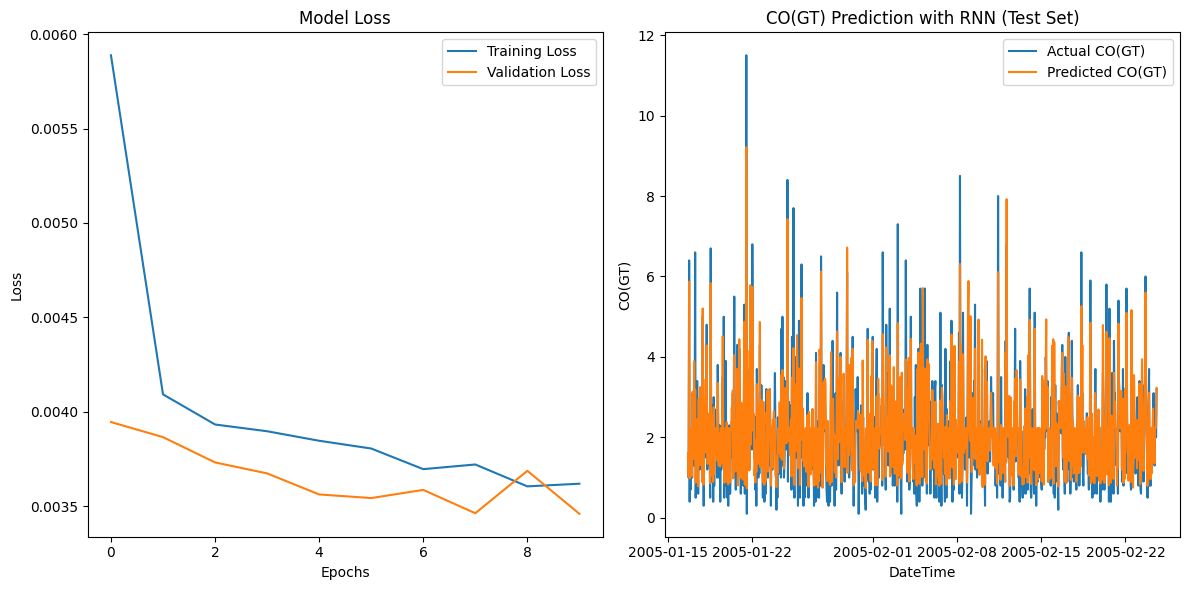

In [28]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_orig = scaler.inverse_transform(y_test)
r2 = r2_score(y_test_orig, predictions)
mae = mean_absolute_error(y_test_orig, predictions)
print(f'R-squared :: {r2:.4f}')
print(f'Mean Absolute Error (MAE) :: {mae:.4f}')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df.index[sequence_length+len(X_train):sequence_length+len(X_train)+len(predictions)], y_test_orig, label='Actual CO(GT)')
plt.plot(df.index[sequence_length+len(X_train):sequence_length+len(X_train)+len(predictions)], predictions, label='Predicted CO(GT)')
plt.title('CO(GT) Prediction with RNN (Test Set)')
plt.xlabel('DateTime')
plt.ylabel('CO(GT)')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
from tensorflow.keras.models import save_model
model.save('rnn_model_part3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
